# IBM HR Attrition: Exploraty Data Analysis Project

**Purpose (from Kaggle)** \
Uncover the factors that lead to employee attrition and explore important questions such as ‘show me a breakdown of distance from home by job role and attrition’ or ‘compare average monthly income by education and attrition’. This is a fictional data set created by IBM data scientists.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Load in Data

Load in the data and do some initial exploration

In [9]:
df = pd.read_csv('datasets_1067_1925_WA_Fn-UseC_-HR-Employee-Attrition.csv')

In [3]:
pd.options.display.max_columns = 35 #35 columns in data set
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,3,Male,41,4,2,Laboratory Technician,4,Married,2571,12290,4,Y,No,17,3,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,4,Male,42,2,3,Healthcare Representative,1,Married,9991,21457,4,Y,No,15,3,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,2,Male,87,4,2,Manufacturing Director,2,Married,6142,5174,1,Y,Yes,20,4,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,4,Male,63,2,2,Sales Executive,2,Married,5390,13243,2,Y,No,14,3,4,80,0,17,3,2,9,6,0,8


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [5]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,14313.103401,2.693197,15.209524,3.153741,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,1.102846,4707.956783,7117.786044,2.498009,3.659938,0.360824,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,8047.000000,1.000000,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,14235.500000,2.000000,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,4.000000,8379.000000,20461.500000,4.000000,18.000000,3.000000,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


#### Explore values of qualitative columns

In [5]:
# make categorical columns list and print out values
categorical_col = []
for column in df.columns:
    if df[column].dtype == object and len(df[column].unique()) <= 50:
        categorical_col.append(column)
        print(f"{column} : {df[column].unique()}")
        print("====================================")

Attrition : ['Yes' 'No']
BusinessTravel : ['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']
Department : ['Sales' 'Research & Development' 'Human Resources']
EducationField : ['Life Sciences' 'Other' 'Medical' 'Marketing' 'Technical Degree'
 'Human Resources']
Gender : ['Female' 'Male']
JobRole : ['Sales Executive' 'Research Scientist' 'Laboratory Technician'
 'Manufacturing Director' 'Healthcare Representative' 'Manager'
 'Sales Representative' 'Research Director' 'Human Resources']
MaritalStatus : ['Single' 'Married' 'Divorced']
Over18 : ['Y']
OverTime : ['Yes' 'No']


## Attrition Proportions

In [15]:
df2 = df.copy()
df2['Attrition'] = df2.Attrition.astype("category").cat.codes

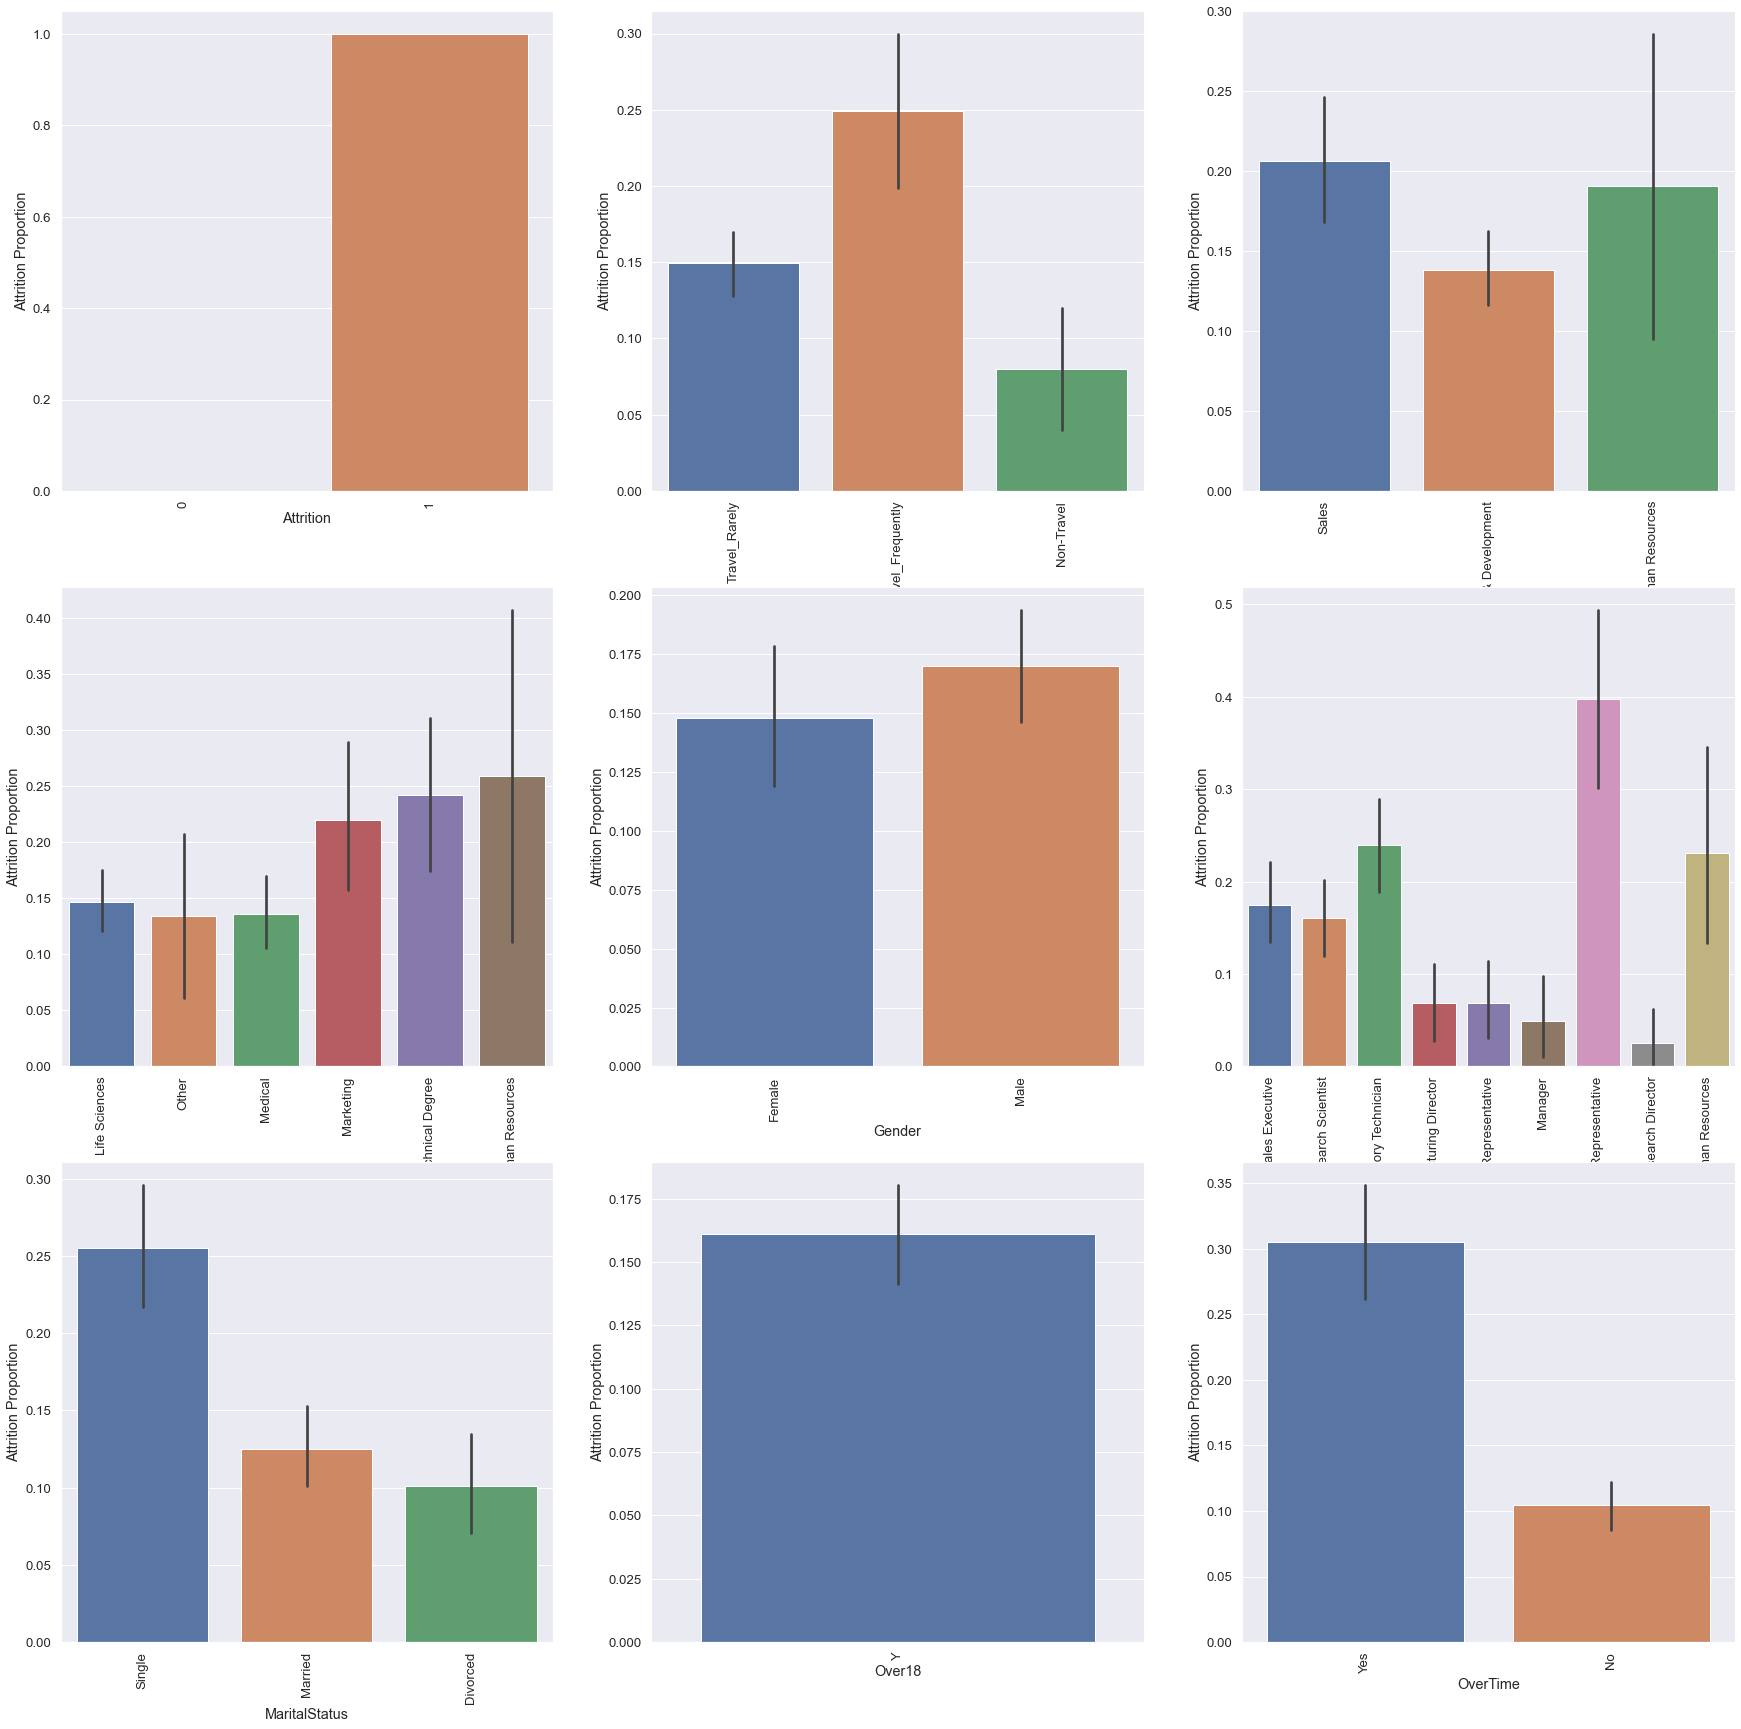

In [17]:
sns.set(font_scale=1.2)
plt.figure(figsize=(30, 30))

for i, column in enumerate(categorical_col, 1):
    plt.subplot(3, 3, i)
    g = sns.barplot(x=f"{column}", y='Attrition', data=df2)
    g.set_xticklabels(g.get_xticklabels(), rotation=90)
    plt.ylabel('Attrition Proportion')
    plt.xlabel(f'{column}')

**Quick Hits**

- **Travel:** Employees that travel frequently are more likely to leave the company
- **Department:** Employees in Sales are more likely to leave the company
- **Education:** Employees with an educational back ground in HR are most likely to leave the company followed by Technical Degree and Marketing
- **Gender:** Males are more likely to leave than females
- **Job Role:** Healthcare Representatives are significantly more likely to leave the company
- **Marital Status:** Single employees are most likely to leave the company
- **Over18:** Every employee is over 18, so this shows that roughly 16% of employees leave the company
- **OverTime:** Employees that work overtime are more likely to leave the company

## Deep Dive Analyses

I will be exploring the data/topics in the order listed below. They are in order of my hypothesized affect on attrition.

**1. Income** \
**2. Working Environment**\
**3. Education**\
**4. Work Experience**

### 1. Exploring Income
Does income play a vital role in attrition and/or job performance?

**Questions to Explore:**
1. Do the employees that attrit have significantly lower incomes than those that stay?
    - How is that affected by department?
        - How does the average monthly income vary by department? 
        - Are there significant differences in those that attrit?
2. Do employees with higher job satisfaction get paid more?
    - Are there significant differences between income level and job satisfaction?
3. Are employees that receive smaller raises more likely to attrit?
    - Do employees that leave receive smaller raises (on average)?
    - Are raises given proportionately by department?
    - Are raises given in-line with job performance?

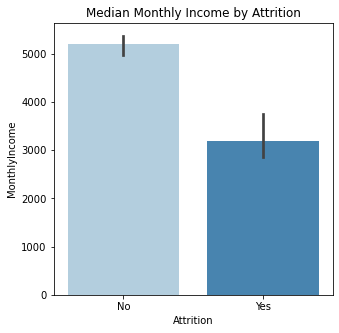

In [42]:
plt.figure(figsize=(5,5))
sns.barplot(x='Attrition',y='MonthlyIncome',data=df, palette="Blues", order=("No", "Yes"), estimator=np.median)
plt.title("Median Monthly Income by Attrition")
plt.show()

**Takeaway:** The median monthly income of those employees that leave the company is lower than those who stay.

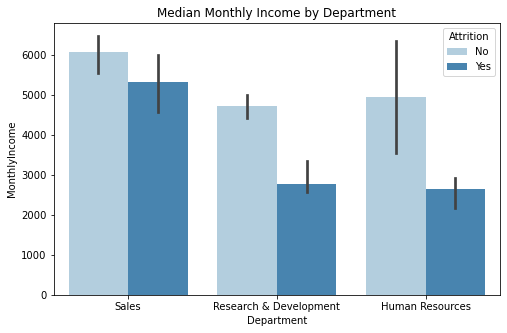

In [43]:
plt.figure(figsize=(8,5))
sns.barplot(x='Department',y='MonthlyIncome',data=df, hue='Attrition', hue_order=("No", "Yes"), palette="Blues", estimator=np.median)
plt.title("Median Monthly Income by Department")
plt.show()

**Takeaway:** The median monthly income is lower among employees that leave the company regardleses of department. The biggest discrepancy in monthly income between employees that stay and employees that leave is in the HR department.

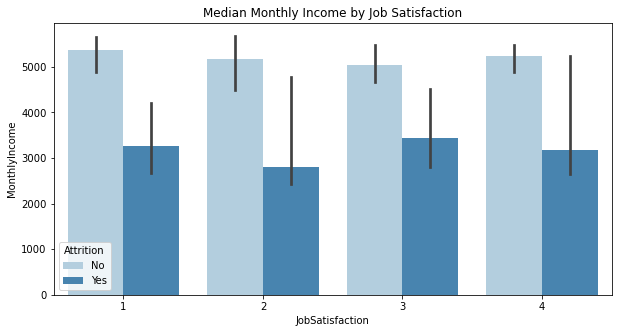

In [44]:
plt.figure(figsize=(10,5))
sns.barplot(x='JobSatisfaction',y='MonthlyIncome',data=df, hue='Attrition', hue_order=("No", "Yes"), palette="Blues", estimator=np.median)
plt.title("Median Monthly Income by Job Satisfaction")
plt.show()

**Takeaway:** Again, monthly income is lower for the employees who left the company than for those who stayed regardless of job satisfaction.

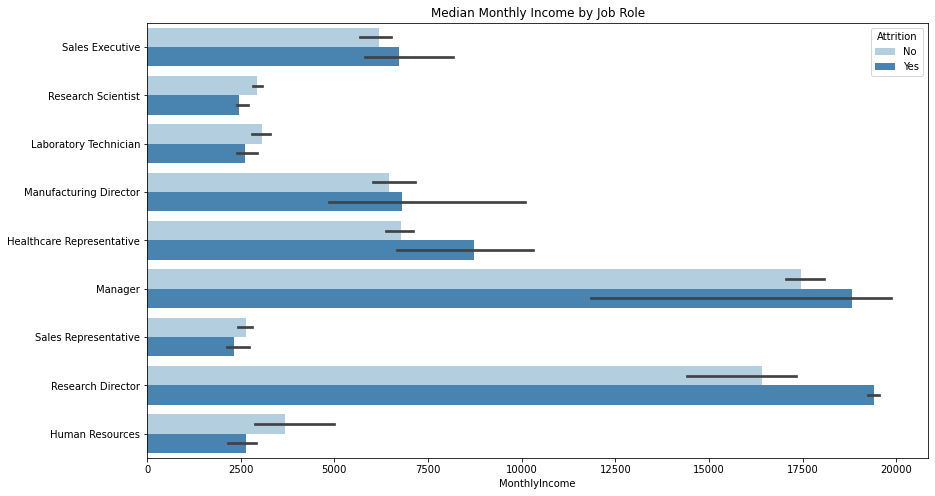

In [45]:
plt.figure(figsize=(14,8))
sns.barplot(y='JobRole',x='MonthlyIncome',data=df, hue='Attrition', hue_order=("No", "Yes"), palette="Blues", estimator=np.median)
plt.title("Median Monthly Income by Job Role")
plt.ylabel(None)
plt.show()

**Takeaway:** Monthly income doesn't paint quite as clear a picture of attrition when broken down by job role. Income seems uneffective in retaining employees in senior leadership roles (Sales Exec, Manufacturing Director, Research Director). Another interesting observation is that Healthcare Reps with a higher income tend to leave the company.  

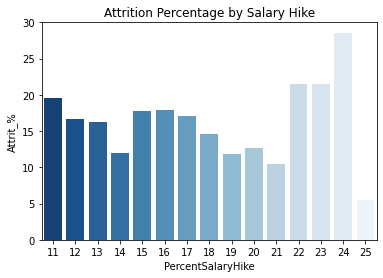

In [393]:
df_pivot = df.pivot_table(values='Age', index='PercentSalaryHike', columns='Attrition', aggfunc='count')
df_pivot['Attrit_%'] = df_pivot['Yes']/(df_pivot['No']+df_pivot['Yes'])*100
df_pivot.reset_index(inplace=True)
sns.barplot(data=df_pivot, x='PercentSalaryHike', y='Attrit_%', palette='Blues_r')
plt.title("Attrition Percentage by Salary Hike")
plt.show()

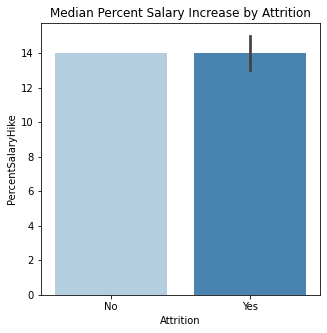

In [46]:
plt.figure(figsize=(5,5))
sns.barplot(data=df, x='Attrition', y='PercentSalaryHike', palette='Blues', order=("No", "Yes"), estimator=np.median)
plt.title("Median Percent Salary Increase by Attrition")
plt.show()

**Takeaway:** There is no discernable relationship between attrtion percentage and the size of the salary hike an employee received. 

In [334]:
cut_labels_5 = ['<14', '14-16', '17-19', '20-22', '>22']
cut_bins = [0, 13, 16, 19, 22, 25]
df['SalaryRaiseBin'] = pd.cut(df['PercentSalaryHike'], bins=cut_bins, labels=cut_labels_5)

<AxesSubplot:xlabel='SalaryRaiseBin'>

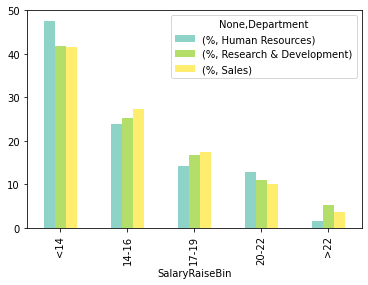

In [335]:
grouped_data = df.groupby(['Department', 'SalaryRaiseBin']).agg({'Age': 'count'})
grouped_data["%"] = grouped_data.groupby(level=0).apply(lambda x:  100*x / x.sum())
grouped_data.drop("Age", axis=1).unstack(level=0).plot(kind='bar', colormap='Set3')

**Takeaway:** Salary hikes are mostly proportional across departments. However, at the extremes, HR receives more "lower" salary hikes and less "higher" salary hikes.

In [231]:
grouped_data2 = df.groupby(['PerformanceRating', 'SalaryRaiseBin']).agg({'Age': 'count'})
grouped_data2["%"] = grouped_data2.groupby(level=0).apply(lambda x:  100*x / x.sum())
grouped_data2.drop("Age", axis=1)

%
PerformanceRating SalaryRaiseBin           
3                 <13             49.598071
                  14-16           30.546624
                  17-19           19.855305
                  20-22            0.000000
                  >23              0.000000
4                 <13              0.000000
                  14-16            0.000000
                  17-19            0.000000
                  20-22           70.353982
                  >23             29.646018

**Takeaway:** Salary hikes were based on Performance Rating. Therefore, we can say that employees did not leave because they were rated a "good" employee but didn't receive a fair raise. However, we cannot say that they did not leave because they felt entitled to a better performance rating.

### 2. Exploring Work Environment
How does the work environment of an employee affect their likelihood to leave the company and their job performance?

**Questions to Explore:**
1. How does job satisfaction vary by Department? Job Role?
2. Do employees with lower job satisfaction leave the company more?
    - How is that affected by department? by job role?
3. How does environment satisfaction affect employee job satisfaction? 
    - How does this affect attrition? Job Performance?
    - What is the distribution of environemnt satisfaction in employees that leave the company?
4. How does the relationship with the manager affect an employee?
    - Do employees with worse manager relationships leave the company more?
    - Do they perform worse?
5. How does overtime affect an employee?
    - Do they have worse job satisfaction?
    - Do they leave the company more?
    - Does it affect job performance?

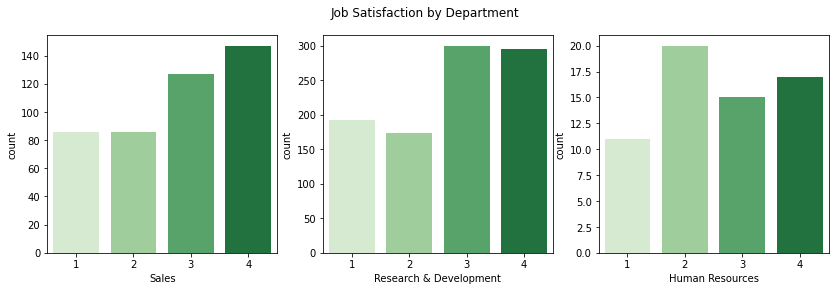

In [433]:
f, axes = plt.subplots(ncols=3, figsize=(14,4), sharex=False, sharey=False)

sns.countplot(df[df['Department'] == 'Sales']['JobSatisfaction'], palette="Greens", ax=axes[0])
axes[0].set(xlabel='Sales')
sns.countplot(df[df['Department'] == 'Research & Development']['JobSatisfaction'], palette="Greens", ax=axes[1])
axes[1].set(xlabel='Research & Development')
sns.countplot(df[df['Department'] == 'Human Resources']['JobSatisfaction'], palette="Greens", ax=axes[2])
axes[2].set(xlabel='Human Resources')

f.suptitle("Job Satisfaction by Department")
plt.show()

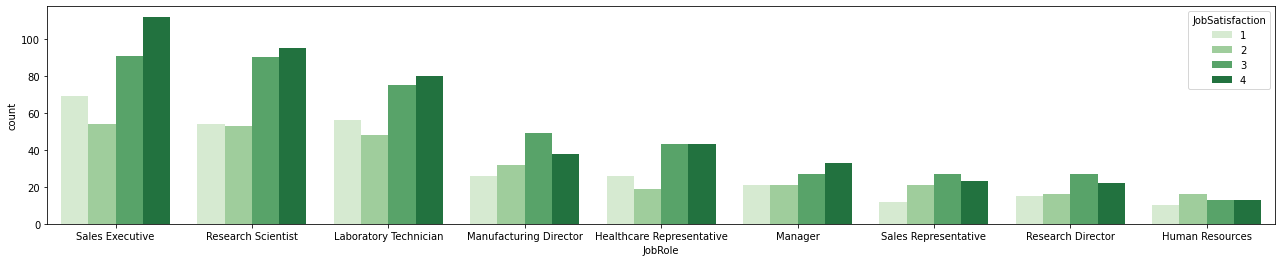

In [420]:
plt.figure(figsize=(22,4))
sns.countplot(df['JobRole'],hue=df['JobSatisfaction'], palette="Greens")
plt.show()

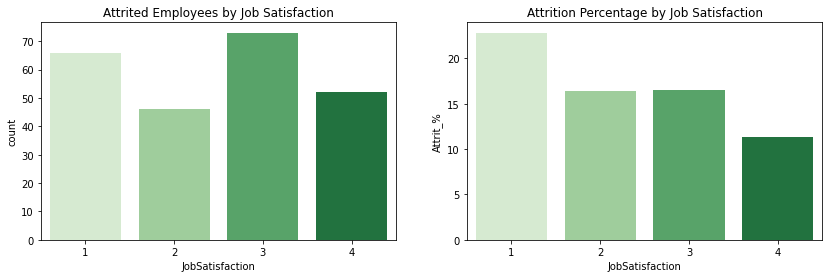

In [56]:
f, axes = plt.subplots(ncols=2, figsize=(14,4), sharex=False, sharey=False)
sns.countplot(df[df['Attrition'] == 'Yes']['JobSatisfaction'], palette='Greens', ax=axes[0])
axes[0].set(title="Attrited Employees by Job Satisfaction")

df_pivot = df.pivot_table(values='Age', index='JobSatisfaction', columns='Attrition', aggfunc='count')
df_pivot['Attrit_%'] = df_pivot['Yes']/(df_pivot['No']+df_pivot['Yes'])*100
df_pivot.reset_index(inplace=True)
sns.barplot(data=df_pivot, x='JobSatisfaction', y='Attrit_%', palette='Greens', ax=axes[1])
axes[1].set(title="Attrition Percentage by Job Satisfaction")

plt.show()

**Takeaway:** Employees with the lowest job satisfaction are most likely to leave the company. However, more employees who rated job satisfaction as "High" left the company.

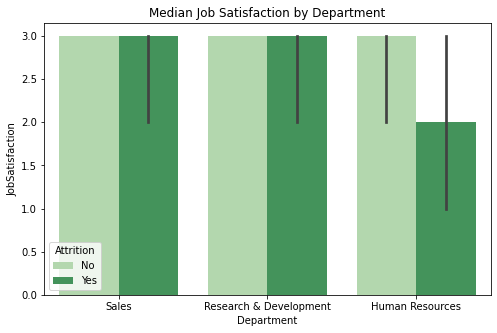

In [47]:
plt.figure(figsize=(8,5))
sns.barplot(x='Department',y='JobSatisfaction',data=df, hue='Attrition', hue_order=("No", "Yes"), palette="Greens", estimator=np.median)
plt.title("Median Job Satisfaction by Department")
plt.show()

**Takeaway:** Employees that leave HR are less satisfied with their job than those that stay.

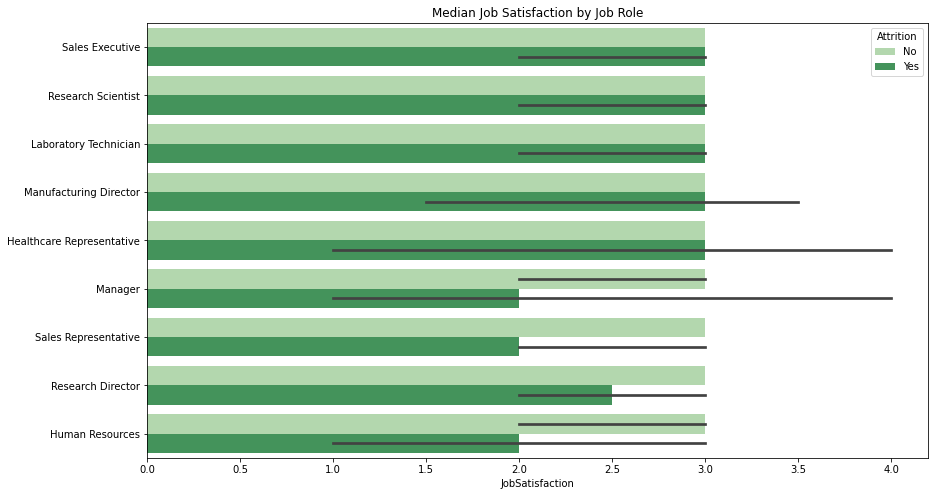

In [48]:
plt.figure(figsize=(14,8))
sns.barplot(y='JobRole',x='JobSatisfaction',data=df, hue='Attrition', hue_order=("No", "Yes"), palette="Greens", estimator=np.median)
plt.title("Median Job Satisfaction by Job Role")
plt.ylabel(None)
plt.show()

**Takeaway:** Employees that leave the roles of Manager, Sales Representative, Research Director, and Human Resources are less satisfied with their jobs.

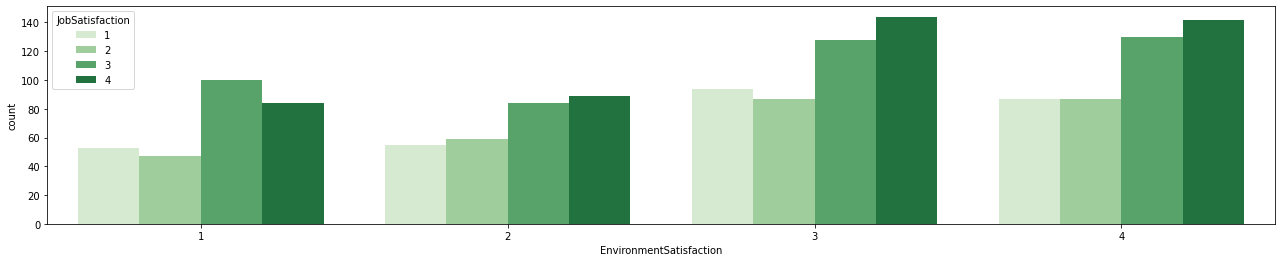

In [49]:
plt.figure(figsize=(22,4))
sns.countplot(df['EnvironmentSatisfaction'],hue=df['JobSatisfaction'], palette="Greens")
plt.show()

**Takeaway:** Job satisfaction is unrelated to enviroment satisfaction.

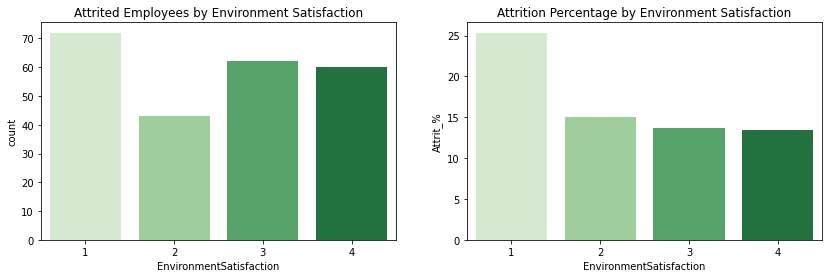

In [55]:
f, axes = plt.subplots(ncols=2, figsize=(14,4), sharex=False, sharey=False)
sns.countplot(df[df['Attrition'] == 'Yes']['EnvironmentSatisfaction'], palette='Greens', ax=axes[0])
axes[0].set(title="Attrited Employees by Environment Satisfaction")

df_pivot = df.pivot_table(values='Age', index='EnvironmentSatisfaction', columns='Attrition', aggfunc='count')
df_pivot['Attrit_%'] = df_pivot['Yes']/(df_pivot['No']+df_pivot['Yes'])*100
df_pivot.reset_index(inplace=True)
sns.barplot(data=df_pivot, x='EnvironmentSatisfaction', y='Attrit_%', palette='Greens', ax=axes[1])
axes[1].set(title="Attrition Percentage by Environment Satisfaction")

plt.show()

**Takeaway:** The worse an employee's environment satisfaction, the more likely s/he is to leave the company.

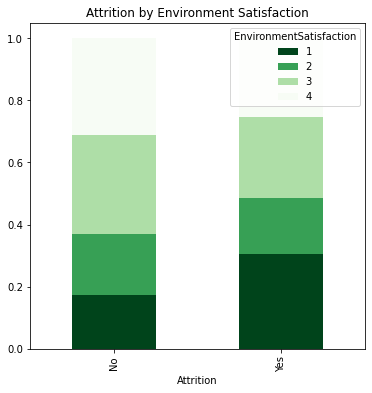

In [120]:
env_satisfaction = pd.crosstab(df.Attrition, df.EnvironmentSatisfaction)
env_satisfaction_pcts = env_satisfaction.div(env_satisfaction.sum(1).astype(float),axis=0)
env_satisfaction_pcts.plot(kind='bar',stacked=True, colormap='Greens_r', figsize=(6,6))
plt.title("Attrition by Environment Satisfaction")
plt.show()

**Takeaway:** Employees that are unsatisfied with their work environment make up a larger proportion of employees that leave the company than those that stay.

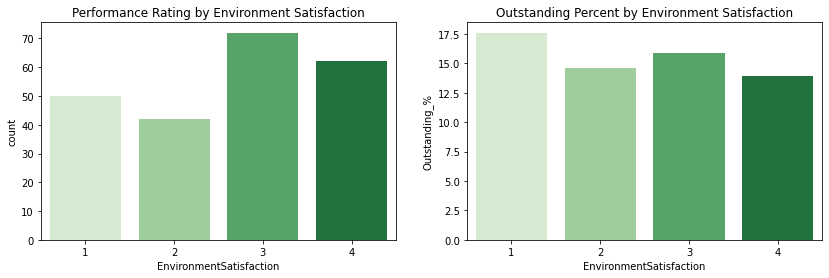

In [54]:
f, axes = plt.subplots(ncols=2, figsize=(14,4), sharex=False, sharey=False)
sns.countplot(df[df['PerformanceRating'] == 4]['EnvironmentSatisfaction'], palette='Greens', ax=axes[0])
axes[0].set(title="Performance Rating by Environment Satisfaction")

df_pivot = df.pivot_table(values='Age', index='EnvironmentSatisfaction', columns='PerformanceRating', aggfunc='count')
df_pivot['Outstanding_%'] = df_pivot[4]/(df_pivot[3]+df_pivot[4])*100
df_pivot.reset_index(inplace=True)
sns.barplot(data=df_pivot, x='EnvironmentSatisfaction', y='Outstanding_%', palette='Greens', ax=axes[1])
axes[1].set(title="Outstanding Percent by Environment Satisfaction")

plt.show()

**Takeaway:** Poor environment satisfaction doesn't have an affect on job performance. In fact, employees in the worst environemnt performed better (17.5% outstanding) than their counterparts. 

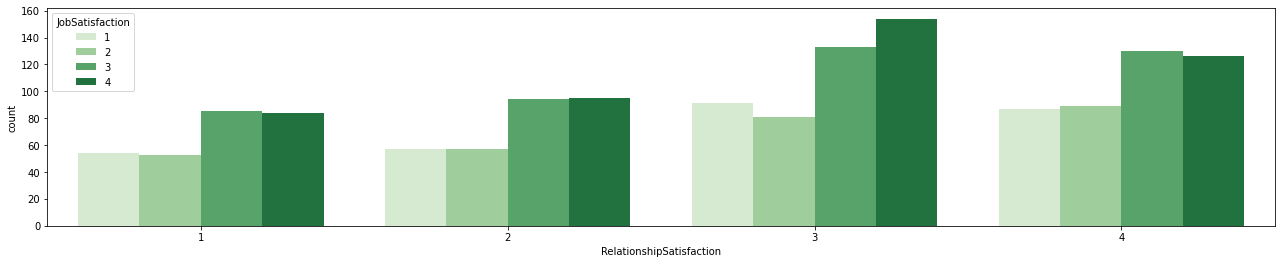

In [57]:
plt.figure(figsize=(22,4))
sns.countplot(df['RelationshipSatisfaction'],hue=df['JobSatisfaction'], palette="Greens")
plt.show()

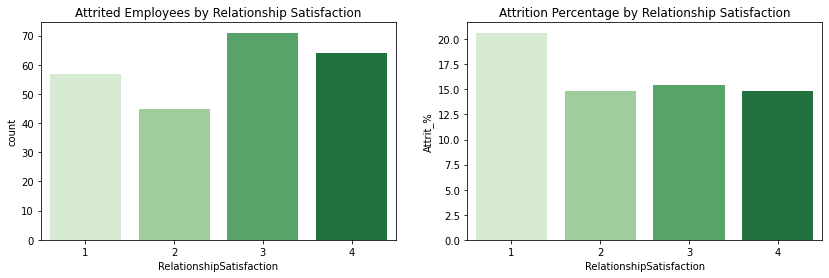

In [58]:
f, axes = plt.subplots(ncols=2, figsize=(14,4), sharex=False, sharey=False)
sns.countplot(df[df['Attrition'] == 'Yes']['RelationshipSatisfaction'], palette='Greens', ax=axes[0])
axes[0].set(title="Attrited Employees by Relationship Satisfaction")

df_pivot = df.pivot_table(values='Age', index='RelationshipSatisfaction', columns='Attrition', aggfunc='count')
df_pivot['Attrit_%'] = df_pivot['Yes']/(df_pivot['No']+df_pivot['Yes'])*100
df_pivot.reset_index(inplace=True)
sns.barplot(data=df_pivot, x='RelationshipSatisfaction', y='Attrit_%', palette='Greens', ax=axes[1])
axes[1].set(title="Attrition Percentage by Relationship Satisfaction")

plt.show()

**Takeaway:** Employees with Low relationship satisfaction had the highest attrition rate. 

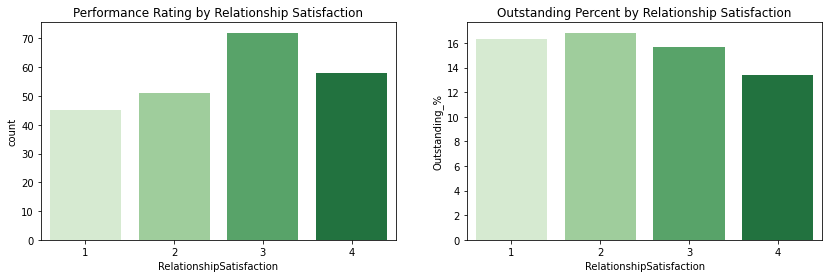

In [59]:
f, axes = plt.subplots(ncols=2, figsize=(14,4), sharex=False, sharey=False)
sns.countplot(df[df['PerformanceRating'] == 4]['RelationshipSatisfaction'], palette='Greens', ax=axes[0])
axes[0].set(title="Performance Rating by Relationship Satisfaction")

df_pivot = df.pivot_table(values='Age', index='RelationshipSatisfaction', columns='PerformanceRating', aggfunc='count')
df_pivot['Outstanding_%'] = df_pivot[4]/(df_pivot[3]+df_pivot[4])*100
df_pivot.reset_index(inplace=True)
sns.barplot(data=df_pivot, x='RelationshipSatisfaction', y='Outstanding_%', palette='Greens', ax=axes[1])
axes[1].set(title="Outstanding Percent by Relationship Satisfaction")

plt.show()

**Takeaway:** Poor relationship satisfaction doesn't have an effect on job performance. In fact, as relationship satisfaction increased, job performance decreased.

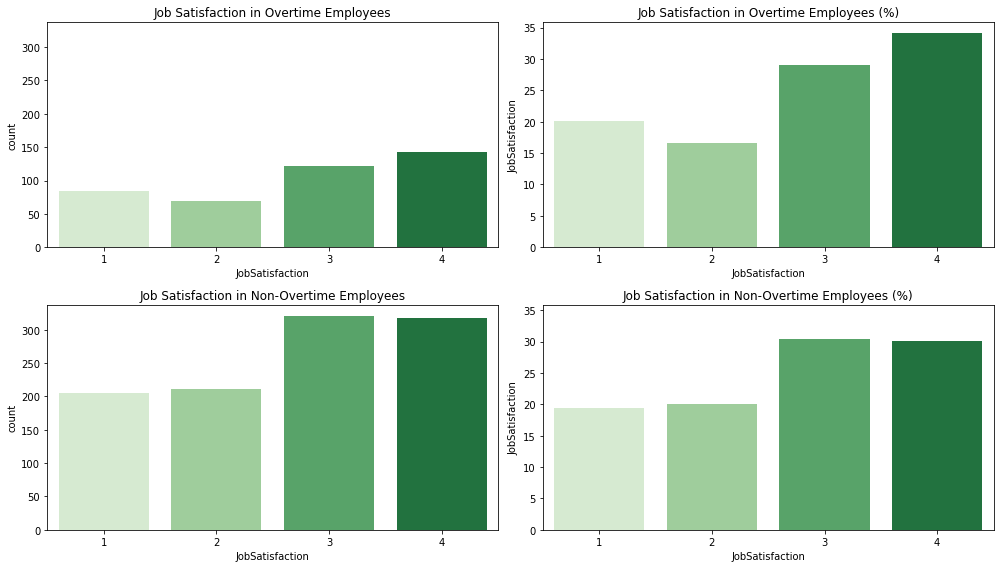

In [34]:
f, axes = plt.subplots(2, 2, figsize=(14,8), sharex=False, sharey='col')
sns.countplot(df[df['OverTime'] == 'Yes']['JobSatisfaction'], palette='Greens', ax=axes[0,0])
axes[0,0].set(title="Job Satisfaction in Overtime Employees")

sns.barplot(x='JobSatisfaction', y='JobSatisfaction', data=df[df['OverTime'] == 'Yes'], 
            estimator=lambda x: len(x) / len(df[df['OverTime'] == 'Yes']) * 100, ax=axes[0,1], palette='Greens')
axes[0,1].set(title="Job Satisfaction in Overtime Employees (%)")

sns.countplot(df[df['OverTime'] == 'No']['JobSatisfaction'], palette='Greens', ax=axes[1,0])
axes[1,0].set(title="Job Satisfaction in Non-Overtime Employees")

sns.barplot(x='JobSatisfaction', y='JobSatisfaction', data=df[df['OverTime'] == 'No'], 
            estimator=lambda x: len(x) / len(df[df['OverTime'] == 'No']) * 100, ax=axes[1,1], palette='Greens')
axes[1,1].set(title="Job Satisfaction in Non-Overtime Employees (%)")

plt.tight_layout()
plt.show()

**Takeaway:** Job satisfaction is generally high among employees regardless of if they work OverTime or not. However, employees with Very High job satisfaction make up a larger proportion of OT employees than Non-OT employees (35% v. 30%).

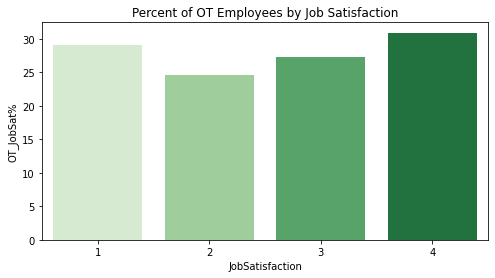

In [42]:
df_pivot = df.pivot_table(values='Age', index='JobSatisfaction', columns='OverTime', aggfunc='count')
df_pivot['OT_JobSat%'] = df_pivot["Yes"]/(df_pivot["Yes"]+df_pivot["No"])*100
df_pivot.reset_index(inplace=True)
plt.figure(figsize=(8,4))
sns.barplot(data=df_pivot, x='JobSatisfaction', y='OT_JobSat%', palette='Greens')
plt.title("Percent of OT Employees by Job Satisfaction")
plt.show()

**Takeaway:** Roughly the same proportion of overtime employees are present in each level of Job Satisfaction; overtime does not significantly contribute to job satisfaction. 

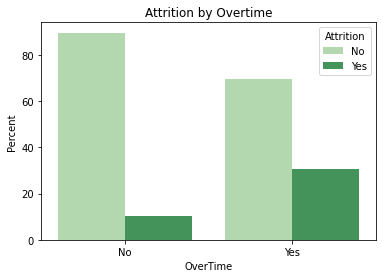

In [159]:
OT_attrition = pd.crosstab(df.OverTime, df.Attrition)
OT_attrition_pcts = OT_attrition.div(OT_attrition.sum(1).astype(float),axis=0)*100
OT_attrition_pcts = OT_attrition_pcts.stack().reset_index().rename(columns={0:'Percent'})
sns.barplot(x="OverTime", y='Percent', hue="Attrition", data=OT_attrition_pcts, palette="Greens")
plt.title("Attrition by Overtime")
plt.show()

**Takeaway:** Approximately 1/3 of employees who work OT leave the company.

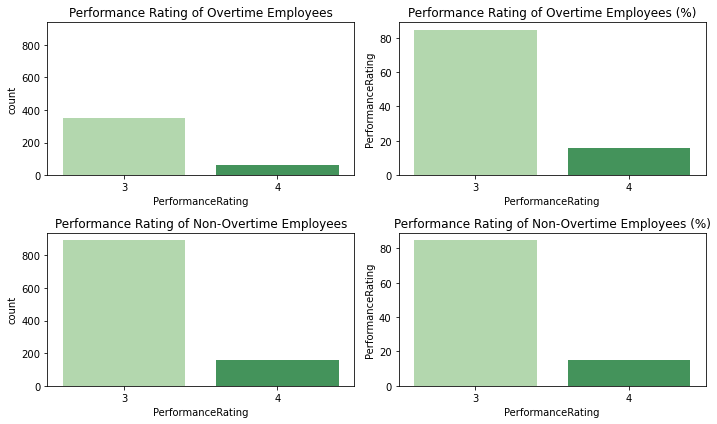

In [81]:
f, axes = plt.subplots(2, 2, figsize=(10,6), sharex=False, sharey='col')
sns.countplot(df[df['OverTime'] == 'Yes']['PerformanceRating'], palette='Greens', ax=axes[0,0])
axes[0,0].set(title="Performance Rating of Overtime Employees")

sns.barplot(x='PerformanceRating', y='PerformanceRating', data=df[df['OverTime'] == 'Yes'], 
            estimator=lambda x: len(x) / len(df[df['OverTime'] == 'Yes']) * 100, ax=axes[0,1], palette='Greens')
axes[0,1].set(title="Performance Rating of Overtime Employees (%)")

sns.countplot(df[df['OverTime'] == 'No']['PerformanceRating'], palette='Greens', ax=axes[1,0])
axes[1,0].set(title="Performance Rating of Non-Overtime Employees")

sns.barplot(x='PerformanceRating', y='PerformanceRating', data=df[df['OverTime'] == 'No'], 
            estimator=lambda x: len(x) / len(df[df['OverTime'] == 'No']) * 100, ax=axes[1,1], palette='Greens')
axes[1,1].set(title="Performance Rating of Non-Overtime Employees (%)")

plt.tight_layout()
plt.show()

**Takeaway:** Overtime does not appear to be a factor in employee performance.

### 3. Exploring Education
How does education level affect attrition and performance?

**Questions to Explore:**
1. How does education vary by Education Field? Department? Job Role?
2. How does attrition vary by Education and Education Field?
3. Is there a noticeable pattern in level of education and likelihood to leave the company?
    - How is that affected by department? by job role?
    - How is this affected by education field?
4. Do younger employees have more education than older employees?
    - Is there a generational difference in education obtained?
5. Does job performance vary proportionally to education level?
    - Do better employees tend to have more education?
    - Do better employees have more education or more years of experience?

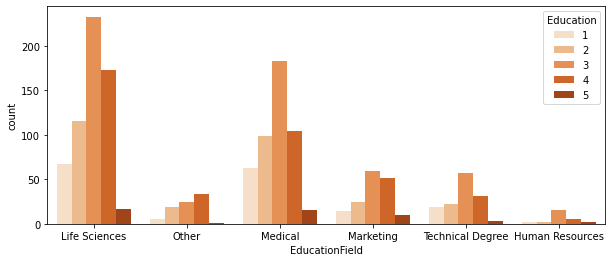

In [318]:
plt.figure(figsize=(10,4))
sns.countplot(df['EducationField'],hue=df['Education'], palette="Oranges")
plt.show()

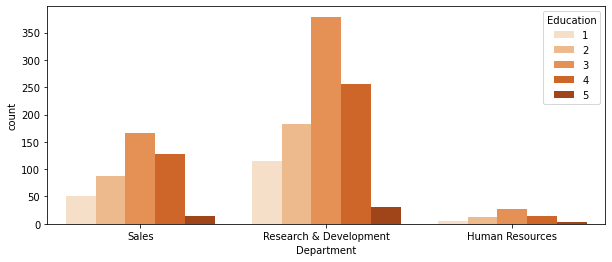

In [321]:
plt.figure(figsize=(10,4))
sns.countplot(df['Department'],hue=df['Education'], palette="Oranges")
plt.show()

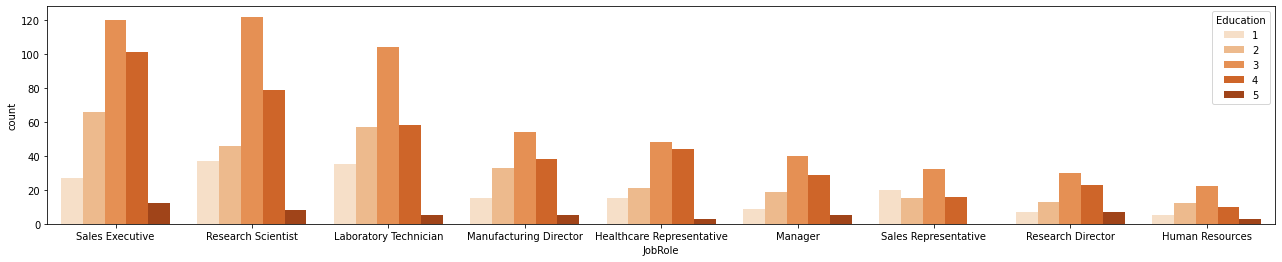

In [421]:
plt.figure(figsize=(22,4))
sns.countplot(df['JobRole'],hue=df['Education'], palette="Oranges")
plt.show()

**Takeaway:** Most fields, departments, and jobs have employees of education level 3 or 4 (Bachelor or Master degree) with very few having a Doctorate. Therefore, we would expect the majority of people that leave the company to also have education level 3 or 4.

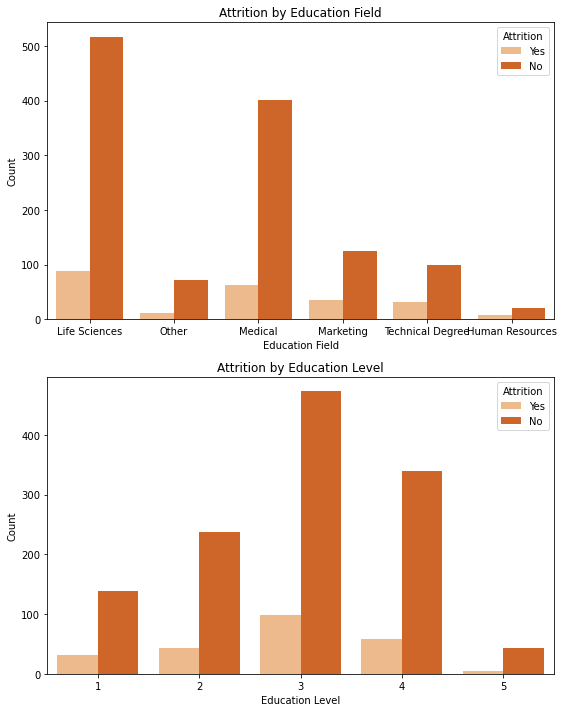

In [324]:
figure, axes = plt.subplots(nrows=2, figsize=(8,10))
# plt.figure(figsize=(12,6))
sns.countplot(df['EducationField'],hue=df['Attrition'], ax=axes[0], palette="Oranges")
axes[0].set_title('Attrition by Education Field')
axes[0].set(xlabel='Education Field', ylabel='Count')
sns.countplot(df['Education'],hue=df['Attrition'],ax=axes[1], palette="Oranges")
axes[1].set_title('Attrition by Education Level')
axes[1].set(xlabel='Education Level', ylabel='Count')

plt.tight_layout()

**Takeaway:** Here I am looking to make sure attrition is proportional to the counts by Education Field and Education Level which it is, so no red flags.

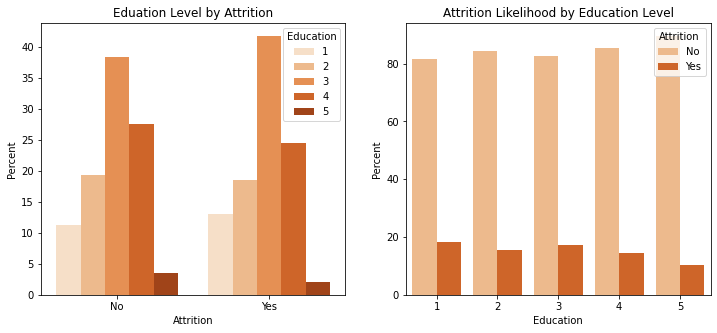

In [158]:
Edu_attrition = pd.crosstab(df.Attrition, df.Education)
Edu_attrition_pcts = Edu_attrition.div(Edu_attrition.sum(1).astype(float),axis=0)*100
Edu_attrition_pcts = Edu_attrition_pcts.stack().reset_index().rename(columns={0:'Percent'})

Edu_attrition2 = pd.crosstab(df.Education, df.Attrition)
Edu_attrition_pcts2 = Edu_attrition2.div(Edu_attrition2.sum(1).astype(float),axis=0)*100
Edu_attrition_pcts2 = Edu_attrition_pcts2.stack().reset_index().rename(columns={0:'Percent'})

f, axes = plt.subplots(ncols=2, figsize=(12,5), sharex=False, sharey=False)
sns.barplot(x="Attrition", y='Percent', hue="Education", data=Edu_attrition_pcts, palette="Oranges", ax=axes[0])
axes[0].set_title("Eduation Level by Attrition")
sns.barplot(x="Education", y='Percent', hue="Attrition", data=Edu_attrition_pcts2, palette="Oranges", ax=axes[1])
axes[1].set_title("Attrition Likelihood by Education Level")

plt.show()

**Takeaway:** Education level does not seem to play a part in whether an employee leaves or stays.

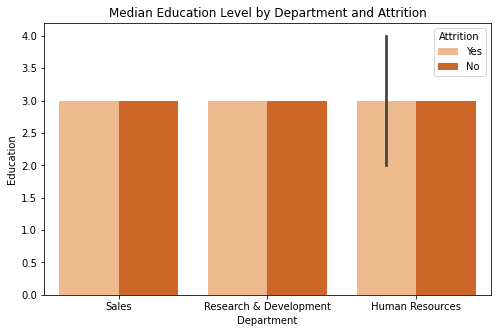

In [144]:
plt.figure(figsize=(8,5))
sns.barplot(x='Department', y='Education',data=df, hue='Attrition', hue_order={"No", "Yes"}, palette="Oranges", estimator=np.median)
plt.title("Median Education Level by Department and Attrition")
plt.show()

**Takeaway:** Median education level is equivalent by department amoung those who leave or stay.

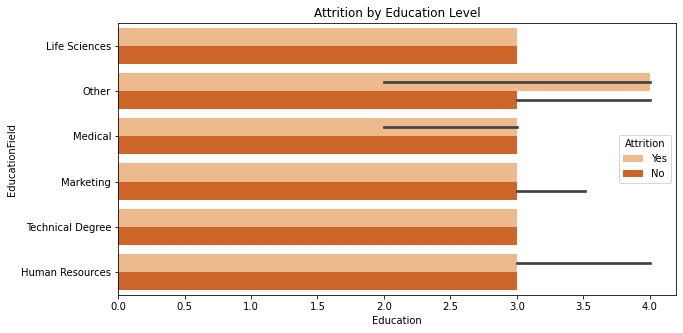

In [306]:
plt.figure(figsize=(10,5))
sns.barplot(data=df, x='Education', y='EducationField',hue='Attrition', palette="Oranges", estimator=np.median)
plt.title('Attrition by Education Level')
plt.show()

**Takeaway:** There is mostly no difference in education by job role between those who leave or stay. However, education level does vary between those that leave and stay for three job roles: Manufacturing Directors (higher among those that leave), Healthcare Representatives (lower), and Research Directors (higher).

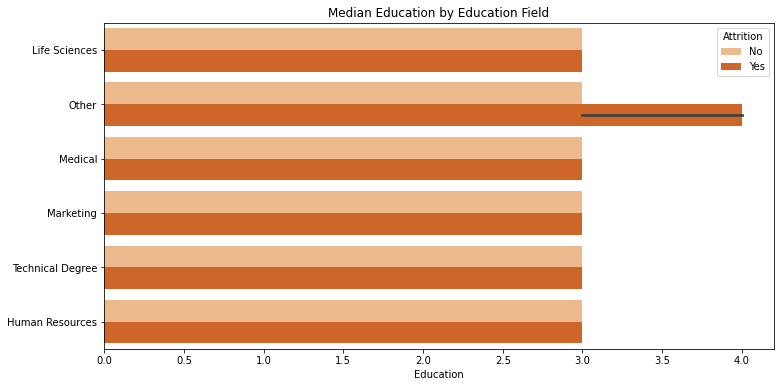

In [326]:
plt.figure(figsize=(12,6))
sns.barplot(y='EducationField',x='Education',data=df, hue='Attrition', hue_order={"No", "Yes"}, palette="Oranges", estimator=np.median, ci=50)
plt.title("Median Education by Education Field")
plt.ylabel(None)
plt.show()

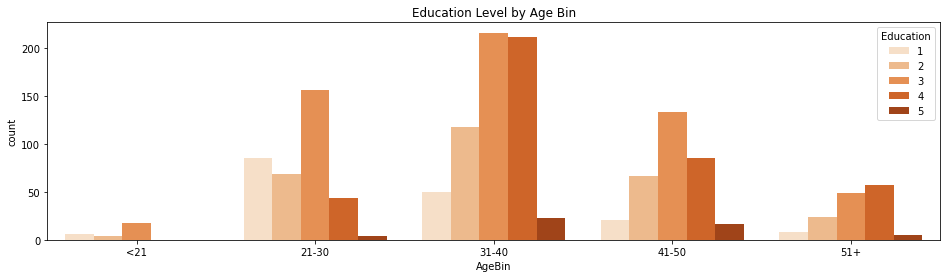

In [145]:
cut_labels = ['<21', '21-30', '31-40', '41-50', '51+']
cut_bins = [0, 20, 30, 40, 50, 60]
df['AgeBin'] = pd.cut(df['Age'], bins=cut_bins, labels=cut_labels)

plt.figure(figsize=(16,4))
sns.countplot(df['AgeBin'],hue=df['Education'], palette="Oranges", )
plt.title('Education Level by Age Bin')
plt.show()

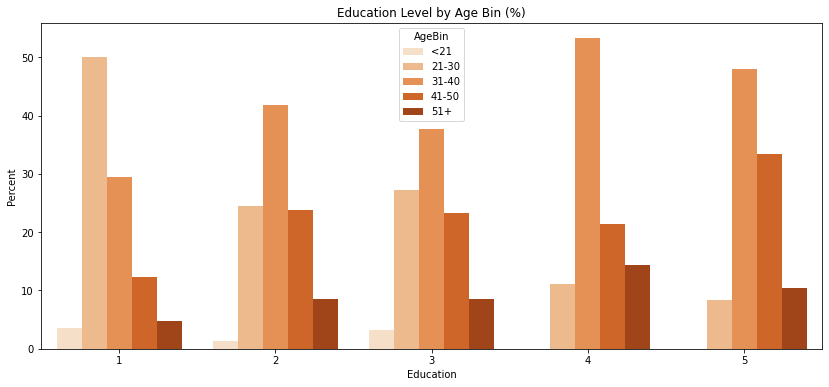

In [157]:
age_education = pd.crosstab(df.Education, df.AgeBin)
age_education_pcts = age_education.div(age_education.sum(1).astype(float),axis=0)*100
age_education_pcts = age_education_pcts.stack().reset_index().rename(columns={0:'Percent'})

plt.figure(figsize=(14,6))
sns.barplot(x="Education", y='Percent', hue="AgeBin", data=age_education_pcts, palette="Oranges")
plt.title('Education Level by Age Bin (%)')
plt.show()

**Takeaway:** More than 50% of "Below College" education is made up of employees younger than 30. About 70% of employees with Bachelor's degrees (level 3) are between 21 and 40 years old. Higher education employees (levels 4 and 5) are primarily made up of 31-40 year olds followed by 41-50 year olds. **The highest levels of education are more prevalent in older employees, but Bachelor's degrees are predominanlty owned by younger employees (21-40).**

In [155]:
age_education_pcts2

,EducationBin,AgeBin,Percent
0,No College,<21,0.035294
1,No College,21-30,0.500000
2,No College,31-40,0.294118
3,No College,41-50,0.123529
4,No College,51+,0.047059
5,Some College,<21,0.014184
6,Some College,21-30,0.244681
7,Some College,31-40,0.418440
8,Some College,41-50,0.237589
9,Some College,51+,0.085106


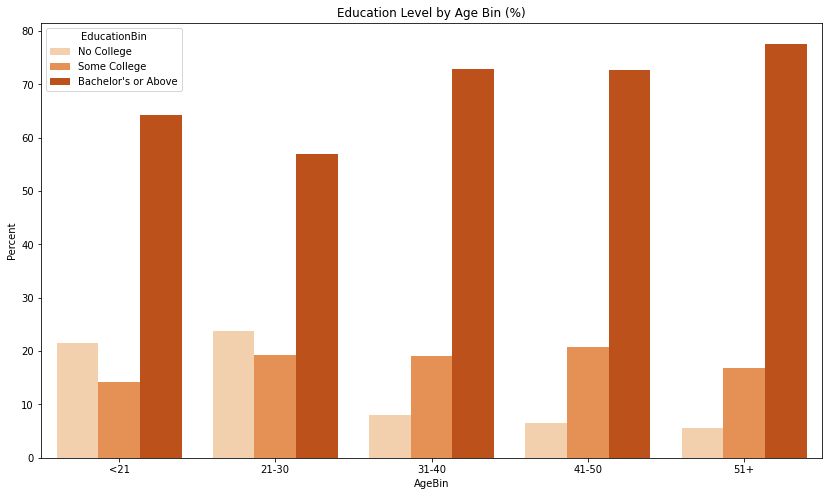

In [161]:
cut_labels = ['No College', 'Some College', 'Bachelor\'s or Above']
cut_bins = [0, 1, 2, 5]
df['EducationBin'] = pd.cut(df['Education'], bins=cut_bins, labels=cut_labels)

age_education2 = pd.crosstab(df.AgeBin, df.EducationBin)
age_education_pcts2 = age_education2.div(age_education2.sum(1).astype(float),axis=0)*100
age_education_pcts2 = age_education_pcts2.stack().reset_index().rename(columns={0:'Percent'})

plt.figure(figsize=(14,8))
sns.barplot(x="AgeBin", y='Percent', hue="EducationBin", data=age_education_pcts2, palette="Oranges")
plt.title('Education Level by Age Bin (%)')
plt.show()

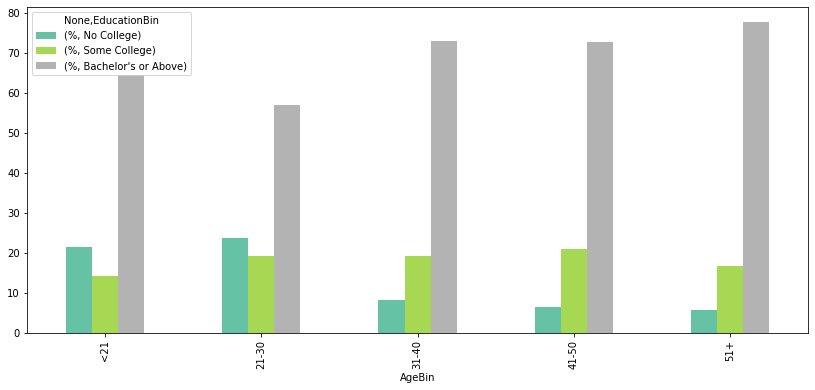

In [384]:
cut_labels = ['No College', 'Some College', 'Bachelor\'s or Above']
cut_bins = [0, 1, 2, 5]
df['EducationBin'] = pd.cut(df['Education'], bins=cut_bins, labels=cut_labels)

age_education2 = df.groupby(['AgeBin', 'EducationBin']).agg({'Age': 'count'})
age_education2["%"] = age_education2.groupby(level=0).apply(lambda x:  100*x / x.sum())
age_education2.drop("Age", axis=1).unstack().plot(kind='bar', figsize=(14,6), cmap='Set2')
plt.show()

**Takeaway:** The proportion of employees obtaining a Bachelor's degree is highest in employees older than 31. 

## 4. Exploring Work Experience

1. How does career length affect an employee?
    - Are more experienced employees more likely to be happy?
    - Are they more likely to stay with the company?
    - Do they perform as well?
2. How does years with the company affect an employee?
    - Are more tenured employees more likely to stay with the company?
    - Do they perform as well?
3. How does years in current role affect an employee?
    - Are stagnant employees more likely to leave?
    - What is the distribution of company tenure in employees that left?
4. What role do promotions play?
    - Do employees leave less frequently shortly after a promotion?

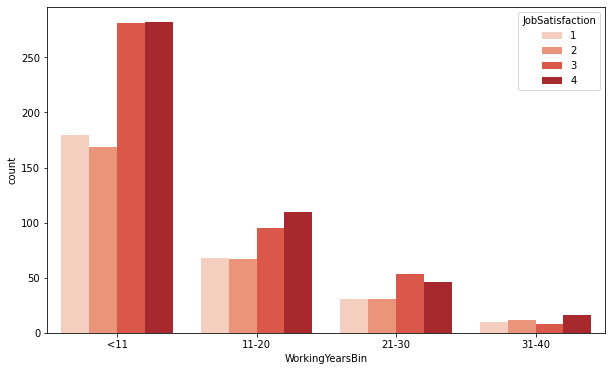

In [17]:
# bin the years worked by 10
cut_labels = ['<11', '11-20', '21-30', '31-40']
cut_bins = [0, 10, 20, 30, 40]
df['WorkingYearsBin'] = pd.cut(df['TotalWorkingYears'], bins=cut_bins, labels=cut_labels)

plt.figure(figsize=(10,6))
sns.countplot('WorkingYearsBin',hue='JobSatisfaction',data=df, palette='Reds')
plt.show()

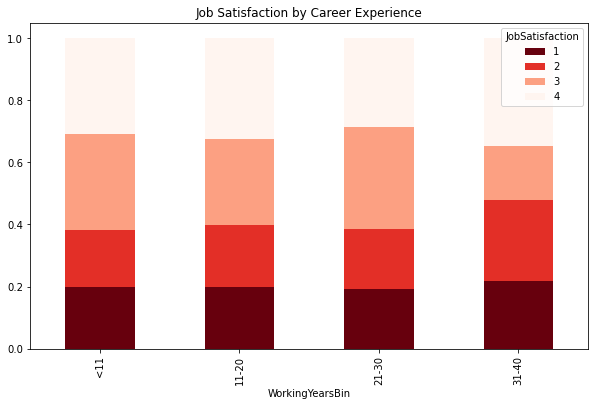

In [26]:
years_satisfaction = pd.crosstab(df.WorkingYearsBin, df.JobSatisfaction)
years_satisfaction_pcts = years_satisfaction.div(years_satisfaction.sum(1).astype(float),axis=0)
years_satisfaction_pcts.plot(kind='bar',stacked=True, colormap='Reds_r', figsize=(10,6))
plt.title("Job Satisfaction by Career Experience")
plt.show()

**Takeaway:** The most experienced employees (31-40 years experience) report lower levels of job satisfaction (~50% are below "High").

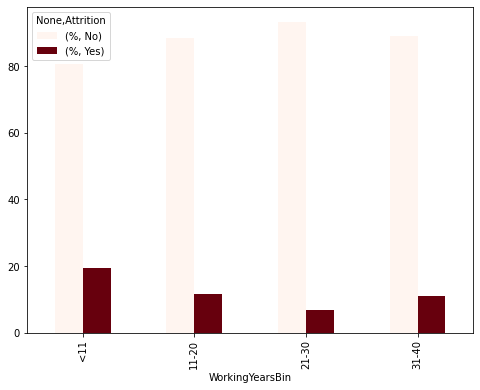

In [24]:
grouped_data4 = df.groupby(['WorkingYearsBin', 'Attrition']).agg({'Age': 'count'})
grouped_data4["%"] = grouped_data4.groupby(level=0).apply(lambda x:  100*x / x.sum())
grouped_data4.drop("Age", axis=1).unstack().plot(kind='bar', sort_columns=True, colormap='Reds', figsize=(8,6))
plt.show()

**Takeaway:** Generally, the more inexperienced an employee, the more likely s/he is to leave the company.

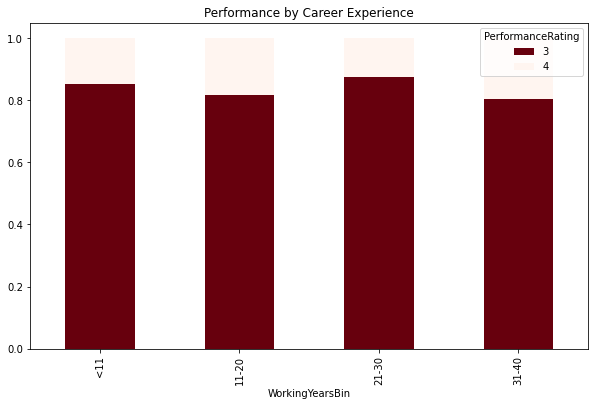

In [29]:
years_performance = pd.crosstab(df.WorkingYearsBin, df.PerformanceRating)
years_performance_pcts = years_performance.div(years_performance.sum(1).astype(float),axis=0)
years_performance_pcts.plot(kind='bar',stacked=True, colormap='Reds_r', figsize=(10,6))
plt.title("Performance by Career Experience")
plt.show()

**Takeaway:** Job performance is distributed somewhat equally among levels of career experience.

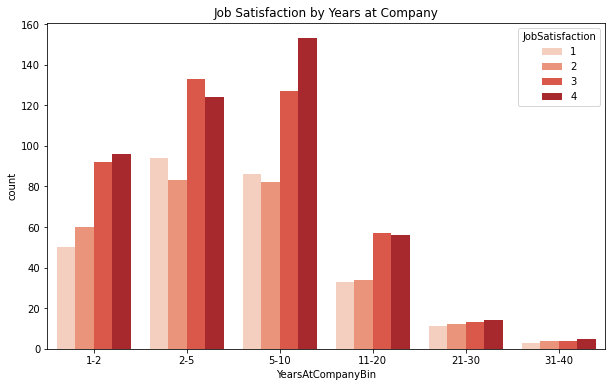

In [171]:
# bin the years at company smaller bins to start
cut_labels = ['1-2', '2-5', '5-10', '11-20', '21-30', '31-40']
cut_bins = [0, 2, 5, 10, 20, 30, 40]
df['YearsAtCompanyBin'] = pd.cut(df['YearsAtCompany'], bins=cut_bins, labels=cut_labels)

plt.figure(figsize=(10,6))
sns.countplot('YearsAtCompanyBin',hue='JobSatisfaction',data=df, palette='Reds')
plt.title("Job Satisfaction by Years at Company")
plt.show()

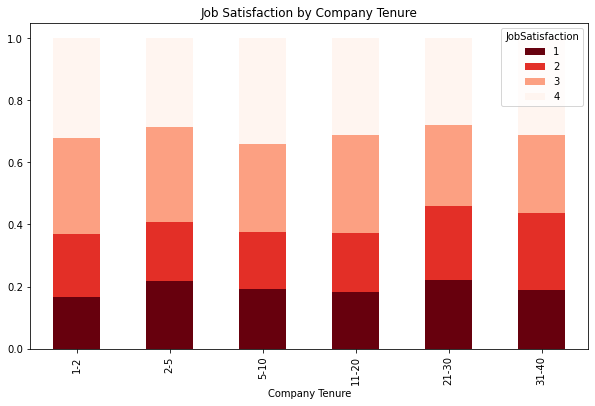

In [172]:
comp_tenure_satisfaction = pd.crosstab(df.YearsAtCompanyBin, df.JobSatisfaction)
comp_tenure_satisfaction_pcts = comp_tenure_satisfaction.div(comp_tenure_satisfaction.sum(1).astype(float),axis=0)
comp_tenure_satisfaction_pcts.plot(kind='bar',stacked=True, colormap='Reds_r', figsize=(10,6))
plt.title("Job Satisfaction by Company Tenure")
plt.xlabel("Company Tenure")
plt.show()

**Takeaway:** No clear pattern emerges for job satisfaction by company tenure.

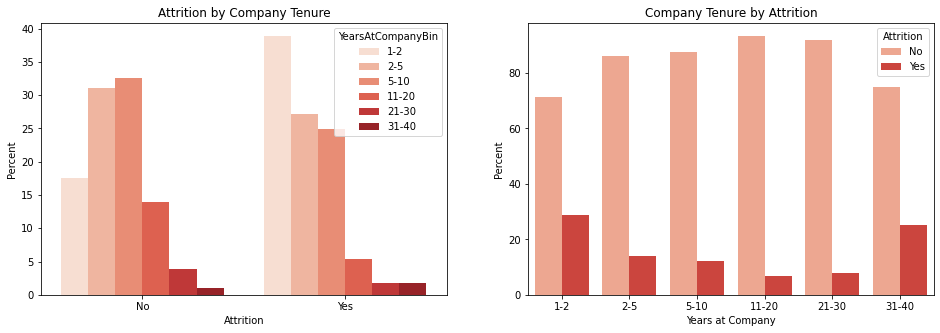

In [191]:
tenure_data = pd.crosstab(df.Attrition, df.YearsAtCompanyBin)
tenure_data2 = pd.crosstab(df.YearsAtCompanyBin, df.Attrition)
tenure_data_pcts = tenure_data.div(tenure_data.sum(1).astype(float),axis=0)*100
tenure_data_pcts2 = tenure_data2.div(tenure_data2.sum(1).astype(float),axis=0)*100
tenure_data_pcts = tenure_data_pcts.stack().reset_index().rename(columns={0:'Percent'})
tenure_data_pcts2 = tenure_data_pcts2.stack().reset_index().rename(columns={0:'Percent'})

f, axes = plt.subplots(ncols=2, sharex=False, sharey=False, figsize=(16,5))
sns.barplot(x="Attrition", y='Percent', hue="YearsAtCompanyBin", data=tenure_data_pcts, palette="Reds", ax=axes[0])
axes[0].set_title("Attrition by Company Tenure")
axes[0].set_xlabel("Attrition")
sns.barplot(x="YearsAtCompanyBin", y='Percent', hue="Attrition", data=tenure_data_pcts2, palette="Reds", ax=axes[1])
axes[1].set_title("Company Tenure by Attrition")
axes[1].set_xlabel("Years at Company")
plt.show()

**Takeaway:** About 4 out of every 10 employees that leave the company have only worked there for 1-2 years. Nearly 90% of employees that leave the company have been with the company 10 years or less. Of all employees, the newest as well as most experienced employees leave the company most. 

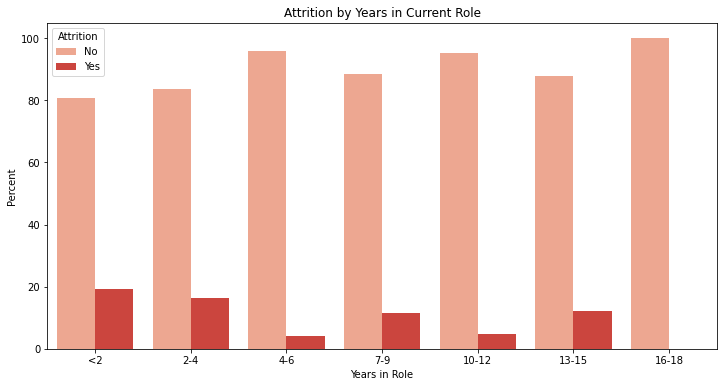

In [179]:
# bin the years in current role
cut_labels = ['<2', '2-4', '4-6', '7-9', '10-12', '13-15', '16-18']
cut_bins = [0, 1, 4, 6, 9, 12, 15, 18]
df['YearsInRoleBin'] = pd.cut(df['YearsInCurrentRole'], bins=cut_bins, labels=cut_labels)

current_role_data = pd.crosstab(df.YearsInRoleBin, df.Attrition)
current_role_data_pcts = current_role_data.div(current_role_data.sum(1).astype(float),axis=0)*100
current_role_data_pcts = current_role_data_pcts.stack().reset_index().rename(columns={0:'Percent'})

plt.figure(figsize=(12,6))
sns.barplot(x="YearsInRoleBin", y='Percent', hue="Attrition", data=current_role_data_pcts, palette="Reds")
plt.title("Attrition by Years in Current Role")
plt.xlabel("Years in Role")
plt.show()

**Takeaway:** Employees new to their role tend to leave the company more.

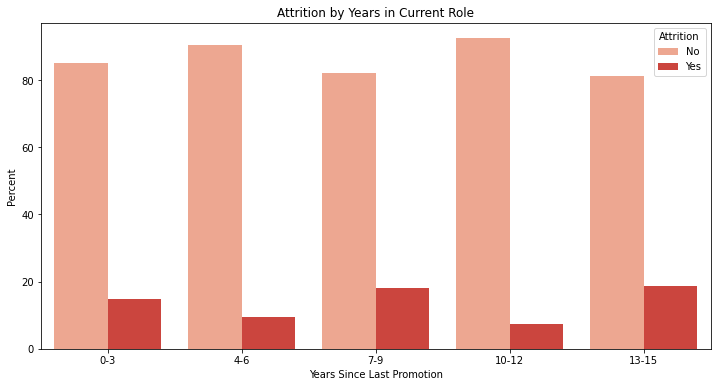

In [193]:
# bin the years since last promo
cut_labels = ['0-3', '4-6', '7-9', '10-12', '13-15']
cut_bins = [0, 3, 6, 9, 12, 15]
df['YearsSincePromoBin'] = pd.cut(df['YearsSinceLastPromotion'], bins=cut_bins, labels=cut_labels)

promotion_data = pd.crosstab(df.YearsSincePromoBin, df.Attrition)
promotion_data_pcts = promotion_data.div(promotion_data.sum(1).astype(float),axis=0)*100
promotion_data_pcts = promotion_data_pcts.stack().reset_index().rename(columns={0:'Percent'})

plt.figure(figsize=(12,6))
sns.barplot(x="YearsSincePromoBin", y='Percent', hue="Attrition", data=promotion_data_pcts, palette="Reds")
plt.title("Attrition by Years in Current Role")
plt.xlabel('Years Since Last Promotion')
plt.show()

**Takeaway:** Years since last promotion doesn't seem to impact an employees decision to leave the company.

## Exploring questions posed in prompt
"Explore important questions such as ‘show me a breakdown of distance from home by job role and attrition’ or ‘compare average monthly income by education and attrition"

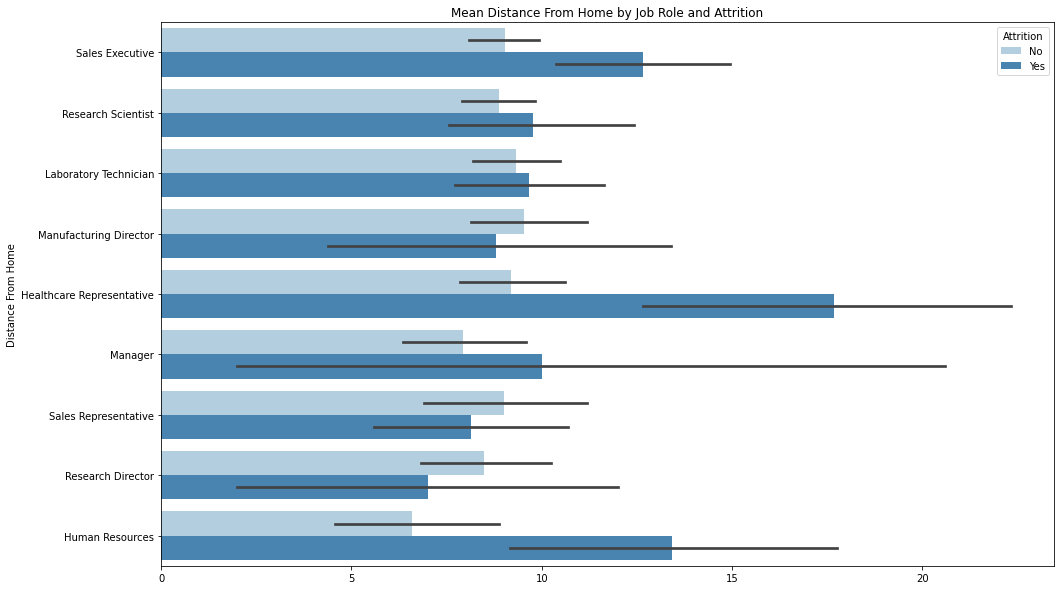

In [122]:
plt.figure(figsize=(16,10))
sns.barplot(x='DistanceFromHome', y='JobRole', hue='Attrition', data=df, palette='Blues', hue_order=("No", "Yes"))
plt.title("Mean Distance From Home by Job Role and Attrition")
plt.xlabel(None)
plt.ylabel("Distance From Home")
plt.show()

**Takeaway:** For most job roles, employeees that leave the company live further away than their peers.

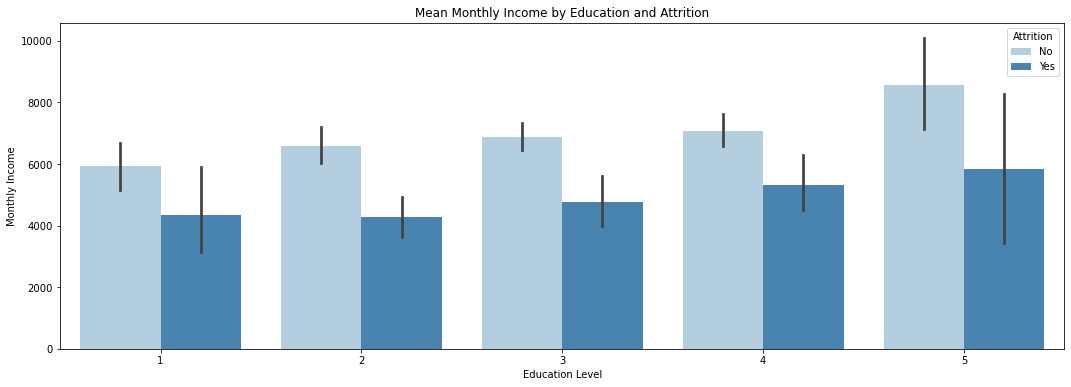

In [123]:
plt.figure(figsize=(18,6))
sns.barplot(x='Education', y='MonthlyIncome', hue='Attrition', data=df, palette='Blues', hue_order=("No", "Yes"))
plt.title("Mean Monthly Income by Education and Attrition")
plt.xlabel("Education Level")
plt.ylabel("Monthly Income")
plt.show()

**Takeaway:** For each education level, employees that stayed with the company have a higher mean income than those that left the company.

# Key Takeaways

**Income**
 - Employees that leave the company earn less income than their peers that stay.

**Work Environement**
 - The worse an employee's environment satisfaction, the more likely s/he is to leave the company.
 - Approximately 1/3 of employees that work OT leave the company.
 
**Education**
 - Education seemingly played no role in an employee's decision to leave the company.
 
**Work Experience**
 - More inexperienced employees are more likely to leave the company.
 - Lesser tenured employees are more likely to leave the company.
 - Employees newer to their roles are more likely to leave the company.
 
**Job Performance**
 - Evaluating job performance was dropped from the analysis after realizing the dataset only contained "Excellent" and "Outstanding" employees